# CSMODEL Phase 1

## Research Question: Which Variables Affect the Quality of Wine the Most ? 

Roles:
Dataset Description - Ethan <br>
Data Cleaning - Paul, Hans <br>
Exploratory Data Analysis - Hans <br>
Research Questions - Paul, Ethan <br>


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

# Reading the dataset 

In [2]:
df = pd.DataFrame()

df = pd.read_csv("winequality-red.csv")

df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# Cleaning the Dataset

In order to conduct a proper study using the <b>red wine dataset</b> it is essential to clean the data and rid the dataset of the following:

- multiple representation of the same categorical value
- incorrect datatype variable
- values that are set to default values of the variable 
- missing data
- duplicate data
- inconsistent formatting

For this study, it is only required to clean variables that will utilized in the study; as such the following varibles will be used

- **`fixed acidity`**: collection of volatility organic acids.
- **`volatile acidity`**:
- **`citric acid`**:
- **`residual sugar`**:
- **`chlorides`**:
- **`free sulfer dioxide`**:
- **`total sulfer dioxide`**:
- **`density`**:
- **`pH`**: the potency and concentration of of the dissociated acids in the wine
- **`sulphates`**:
- **`alchohol`**:
- **`quality`**:


# Get the datatypes per column

In [3]:
datatypes = df.dtypes
datatypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

# Get the null values per column

In [4]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Drop duplicate values

In [5]:
df = df.drop_duplicates(keep = 'first', inplace = False)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### **`fixed acidity`** variable

In [7]:
val = df["fixed acidity"].unique()
val.sort()
print(val)
print(len(val))

[ 4.6  4.7  4.9  5.   5.1  5.2  5.3  5.4  5.5  5.6  5.7  5.8  5.9  6.
  6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9  7.   7.1  7.2  7.3  7.4
  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3  8.4  8.5  8.6  8.7  8.8
  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7  9.8  9.9 10.  10.1 10.2
 10.3 10.4 10.5 10.6 10.7 10.8 10.9 11.  11.1 11.2 11.3 11.4 11.5 11.6
 11.7 11.8 11.9 12.  12.1 12.2 12.3 12.4 12.5 12.6 12.7 12.8 12.9 13.
 13.2 13.3 13.4 13.5 13.7 13.8 14.  14.3 15.  15.5 15.6 15.9]
96


In [8]:
df['fixed acidity'].isnull().sum()

0

Based on looking at the results of the previous code, it is evident that there are no <i>**null**</i> values and <i>**multiple representation**</i> in the **`fixed acidity`** column

therefore, we can conclude that the **`fixed acidity`** column is clean

### **`volatile acidity`** variable



In [9]:
val = df['volatile acidity'].unique()
val.sort()
print(val)
print(len(val))

[0.12  0.16  0.18  0.19  0.2   0.21  0.22  0.23  0.24  0.25  0.26  0.27
 0.28  0.29  0.295 0.3   0.305 0.31  0.315 0.32  0.33  0.34  0.35  0.36
 0.365 0.37  0.38  0.39  0.395 0.4   0.41  0.415 0.42  0.43  0.44  0.45
 0.46  0.47  0.475 0.48  0.49  0.5   0.51  0.52  0.53  0.54  0.545 0.55
 0.56  0.565 0.57  0.575 0.58  0.585 0.59  0.595 0.6   0.605 0.61  0.615
 0.62  0.625 0.63  0.635 0.64  0.645 0.65  0.655 0.66  0.665 0.67  0.675
 0.68  0.685 0.69  0.695 0.7   0.705 0.71  0.715 0.72  0.725 0.73  0.735
 0.74  0.745 0.75  0.755 0.76  0.765 0.77  0.775 0.78  0.785 0.79  0.795
 0.8   0.805 0.81  0.815 0.82  0.825 0.83  0.835 0.84  0.845 0.85  0.855
 0.86  0.865 0.87  0.875 0.88  0.885 0.89  0.895 0.9   0.91  0.915 0.92
 0.935 0.95  0.955 0.96  0.965 0.975 0.98  1.    1.005 1.01  1.02  1.025
 1.035 1.04  1.07  1.09  1.115 1.13  1.18  1.185 1.24  1.33  1.58 ]
143


In [10]:
df['volatile acidity'].isnull().sum()

0

Based on looking at the results of the previous code, it is evident that there are no <i>**null**</i> values and <i>**multiple representation**</i> in the **`volatile acidity`** column

therefore, we can conclude that the **`volatile acidity`** column is clean

### **`citric acid`** variable

In [17]:
val = df['citric acid'].unique()
val.sort()
print(val)
print(len(val))

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.78 0.79 1.  ]
80


In [12]:
df['citric acid'].isnull().sum()

0

Based on looking at the results of the previous code, it is evident that there are no <i>**null**</i> values and <i>**multiple representation**</i> in the **`citric acid`** column

therefore, we can conclude that the **`citric acid`** column is clean

### **`residual sugar`** variable

In [15]:
val = df['residual sugar'].unique()
val.sort()
print(val)
print(len(val))

[ 0.9   1.2   1.3   1.4   1.5   1.6   1.65  1.7   1.75  1.8   1.9   2.
  2.05  2.1   2.15  2.2   2.25  2.3   2.35  2.4   2.5   2.55  2.6   2.65
  2.7   2.8   2.85  2.9   2.95  3.    3.1   3.2   3.3   3.4   3.45  3.5
  3.6   3.65  3.7   3.75  3.8   3.9   4.    4.1   4.2   4.25  4.3   4.4
  4.5   4.6   4.65  4.7   4.8   5.    5.1   5.15  5.2   5.4   5.5   5.6
  5.7   5.8   5.9   6.    6.1   6.2   6.3   6.4   6.55  6.6   6.7   7.
  7.2   7.3   7.5   7.8   7.9   8.1   8.3   8.6   8.8   8.9   9.   10.7
 11.   12.9  13.4  13.8  13.9  15.4  15.5 ]
91


In [16]:
df['residual sugar'].isnull().sum()

0

Based on looking at the results of the previous code, it is evident that there are no <i>**null**</i> values and <i>**multiple representation**</i> in the **`residual sugar`** column

therefore, we can conclude that the **`residual sugar`** column is clean

### **`chlorides`** variable

In [18]:
val = df['chlorides'].unique()
val.sort()
print(val)
print(len(val))

[0.012 0.034 0.038 0.039 0.041 0.042 0.043 0.044 0.045 0.046 0.047 0.048
 0.049 0.05  0.051 0.052 0.053 0.054 0.055 0.056 0.057 0.058 0.059 0.06
 0.061 0.062 0.063 0.064 0.065 0.066 0.067 0.068 0.069 0.07  0.071 0.072
 0.073 0.074 0.075 0.076 0.077 0.078 0.079 0.08  0.081 0.082 0.083 0.084
 0.085 0.086 0.087 0.088 0.089 0.09  0.091 0.092 0.093 0.094 0.095 0.096
 0.097 0.098 0.099 0.1   0.101 0.102 0.103 0.104 0.105 0.106 0.107 0.108
 0.109 0.11  0.111 0.112 0.113 0.114 0.115 0.116 0.117 0.118 0.119 0.12
 0.121 0.122 0.123 0.124 0.125 0.126 0.127 0.128 0.132 0.136 0.137 0.143
 0.145 0.146 0.147 0.148 0.152 0.153 0.157 0.159 0.161 0.165 0.166 0.168
 0.169 0.17  0.171 0.172 0.174 0.176 0.178 0.186 0.19  0.194 0.2   0.205
 0.213 0.214 0.216 0.222 0.226 0.23  0.235 0.236 0.241 0.243 0.25  0.263
 0.267 0.27  0.332 0.337 0.341 0.343 0.358 0.36  0.368 0.369 0.387 0.401
 0.403 0.413 0.414 0.415 0.422 0.464 0.467 0.61  0.611]
153


In [19]:
df['chlorides'].isnull().sum()

0

Based on looking at the results of the previous code, it is evident that there are no <i>**null**</i> values and <i>**multiple representation**</i> in the **`chlorides`** column

therefore, we can conclude that the **`chlorides`** column is clean

### **`free sulfur dioxide`** variable

In [21]:
val = df['free sulfur dioxide'].unique()
val.sort()
print(val)
print(len(val))

[ 1.   2.   3.   4.   5.   5.5  6.   7.   8.   9.  10.  11.  12.  13.
 14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
 28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  37.5 38.  39.  40.
 40.5 41.  42.  43.  45.  46.  47.  48.  50.  51.  52.  53.  54.  55.
 57.  66.  68.  72. ]
60


In [22]:
df['free sulfur dioxide'].isnull().sum()

0

Based on looking at the results of the previous code, it is evident that there are no <i>**null**</i> values and <i>**multiple representation**</i> in the **`free sulfur dioxide`** column

therefore, we can conclude that the **`free sulfur dioxide`** column is clean

### **`total sulfer dioxide`** variable

In [23]:
val = df['total sulfur dioxide'].unique()
val.sort()
print(val)
print(len(val))

[  6.    7.    8.    9.   10.   11.   12.   13.   14.   15.   16.   17.
  18.   19.   20.   21.   22.   23.   24.   25.   26.   27.   28.   29.
  30.   31.   32.   33.   34.   35.   36.   37.   38.   39.   40.   41.
  42.   43.   44.   45.   46.   47.   48.   49.   50.   51.   52.   53.
  54.   55.   56.   57.   58.   59.   60.   61.   62.   63.   64.   65.
  66.   67.   68.   69.   70.   71.   72.   73.   74.   75.   76.   77.
  77.5  78.   79.   80.   81.   82.   83.   84.   85.   86.   87.   88.
  89.   90.   91.   92.   93.   94.   95.   96.   98.   99.  100.  101.
 102.  103.  104.  105.  106.  108.  109.  110.  111.  112.  113.  114.
 115.  116.  119.  120.  121.  122.  124.  125.  126.  127.  128.  129.
 130.  131.  133.  134.  135.  136.  139.  140.  141.  142.  143.  144.
 145.  147.  148.  149.  151.  152.  153.  155.  160.  165.  278.  289. ]
144


In [24]:
df['total sulfur dioxide'].isnull().sum()

0

Based on looking at the results of the previous code, it is evident that there are no <i>**null**</i> values and <i>**multiple representation**</i> in the **`total sulfur dioxide`** column

therefore, we can conclude that the **`total sulfur dioxide`** column is clean

### **`density`** variable

In [25]:
val = df['density'].unique()
val.sort()
print(val)
print(len(val))

[0.99007 0.9902  0.99064 0.9908  0.99084 0.9912  0.9915  0.99154 0.99157
 0.9916  0.99162 0.9917  0.99182 0.99191 0.9921  0.9922  0.99235 0.99236
 0.9924  0.99242 0.99252 0.99256 0.99258 0.99264 0.9927  0.9928  0.99286
 0.9929  0.99292 0.99294 0.99306 0.99314 0.99316 0.99318 0.9932  0.99322
 0.99323 0.99328 0.9933  0.99331 0.99332 0.99334 0.99336 0.9934  0.99341
 0.99344 0.99346 0.99348 0.9935  0.99352 0.99354 0.99356 0.99357 0.99358
 0.9936  0.99362 0.99364 0.9937  0.99371 0.99374 0.99376 0.99378 0.99379
 0.9938  0.99384 0.99385 0.99386 0.99387 0.99388 0.99392 0.99394 0.99395
 0.99396 0.99397 0.994   0.99402 0.99408 0.9941  0.99414 0.99416 0.99417
 0.99418 0.99419 0.9942  0.99425 0.99426 0.99428 0.9943  0.99434 0.99437
 0.99438 0.99439 0.9944  0.99444 0.99448 0.99451 0.99454 0.99456 0.99458
 0.99459 0.9946  0.99462 0.99464 0.99467 0.99468 0.9947  0.99471 0.99472
 0.99473 0.99474 0.99476 0.99478 0.99479 0.9948  0.99483 0.99484 0.99486
 0.99488 0.99489 0.9949  0.99491 0.99492 0.99494 0.

In [26]:
df['density'].isnull().sum()

0

Based on looking at the results of the previous code, it is evident that there are no <i>**null**</i> values and <i>**multiple representation**</i> in the **`density`** column

therefore, we can conclude that the **`density`** column is clean

### **`pH`** variable

In [13]:
val = df["pH"].unique()
val.sort()
print(val)
print(len(val))

[2.74 2.86 2.87 2.88 2.89 2.9  2.92 2.93 2.94 2.95 2.98 2.99 3.   3.01
 3.02 3.03 3.04 3.05 3.06 3.07 3.08 3.09 3.1  3.11 3.12 3.13 3.14 3.15
 3.16 3.17 3.18 3.19 3.2  3.21 3.22 3.23 3.24 3.25 3.26 3.27 3.28 3.29
 3.3  3.31 3.32 3.33 3.34 3.35 3.36 3.37 3.38 3.39 3.4  3.41 3.42 3.43
 3.44 3.45 3.46 3.47 3.48 3.49 3.5  3.51 3.52 3.53 3.54 3.55 3.56 3.57
 3.58 3.59 3.6  3.61 3.62 3.63 3.66 3.67 3.68 3.69 3.7  3.71 3.72 3.74
 3.75 3.78 3.85 3.9  4.01]
89


In [14]:
df['pH'].isnull().sum()

0

Based on looking at the results of the previous code, it is evident that there are no <i>**null**</i> values and <i>**multiple representation**</i> in the **`pH`** column

therefore, we can conclude that the **`pH`** column is clean

### **`sulphates`** variable

In [28]:
val = df['sulphates'].unique()
val.sort()
print(val)
print(len(val))

[0.33 0.37 0.39 0.4  0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51
 0.52 0.53 0.54 0.55 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65
 0.66 0.67 0.68 0.69 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79
 0.8  0.81 0.82 0.83 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93
 0.94 0.95 0.96 0.97 0.98 0.99 1.   1.01 1.02 1.03 1.04 1.05 1.06 1.07
 1.08 1.09 1.1  1.11 1.12 1.13 1.14 1.15 1.16 1.17 1.18 1.2  1.22 1.26
 1.28 1.31 1.33 1.34 1.36 1.56 1.59 1.61 1.62 1.95 1.98 2.  ]
96


In [29]:
df['sulphates'].isnull().sum()

0

Based on looking at the results of the previous code, it is evident that there are no <i>**null**</i> values and <i>**multiple representation**</i> in the **`sulphates`** column

therefore, we can conclude that the **`sulphates`** column is clean

### **`alcohol`** variable

In [31]:
val = df['alcohol'].unique()
val.sort()
print(val)
print(len(val))

[ 8.4         8.5         8.7         8.8         9.          9.05
  9.1         9.2         9.23333333  9.25        9.3         9.4
  9.5         9.55        9.56666667  9.6         9.7         9.8
  9.9         9.95       10.         10.03333333 10.1        10.2
 10.3        10.4        10.5        10.55       10.6        10.7
 10.75       10.8        10.9        11.         11.06666667 11.1
 11.2        11.3        11.4        11.5        11.6        11.7
 11.8        11.9        11.95       12.         12.1        12.2
 12.3        12.4        12.5        12.6        12.7        12.8
 12.9        13.         13.1        13.2        13.3        13.4
 13.5        13.56666667 13.6        14.         14.9       ]
65


In [33]:
df['alcohol'].isnull().sum()

0

Based on looking at the results of the previous code, it is evident that there are no <i>**null**</i> values and <i>**multiple representation**</i> in the **`alcohol`** column

therefore, we can conclude that the **`alcohol`** column is clean

### **`quality`** variable

In [34]:
val = df['quality'].unique()
val.sort()
print(val)
print(len(val))

[3 4 5 6 7 8]
6


In [35]:
df['quality'].isnull().sum()

0

Based on looking at the results of the previous code, it is evident that there are no <i>**null**</i> values and <i>**multiple representation**</i> in the **`quality`** column

therefore, we can conclude that the **`quality`** column is clean

## Exploratory Data Analysis



In [10]:
columns = df.columns
columns = set(columns) - set(['quality'])
columns

{'alcohol',
 'chlorides',
 'citric acid',
 'density',
 'fixed acidity',
 'free sulfur dioxide',
 'pH',
 'residual sugar',
 'sulphates',
 'total sulfur dioxide',
 'volatile acidity'}

### **`Scatter Plot`** (May be wrong since the data is continous)
x = Alcohol, Chlorides, Citric Acid, Density, Fixed Acidity, Free Sulfur Dioxide, pH, Residual Sugar, Sulphates, Total Sulfur Dioxide, Volatile Acidity 

Y = Quality of the wine

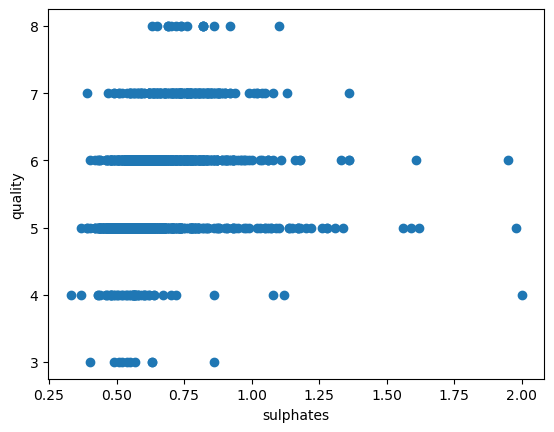

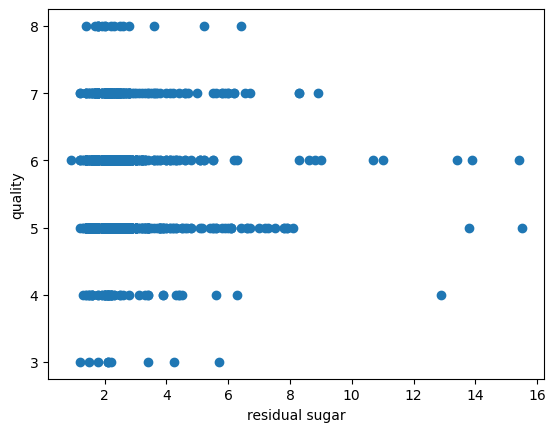

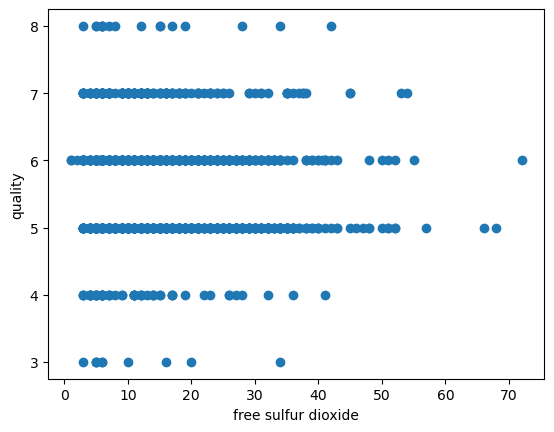

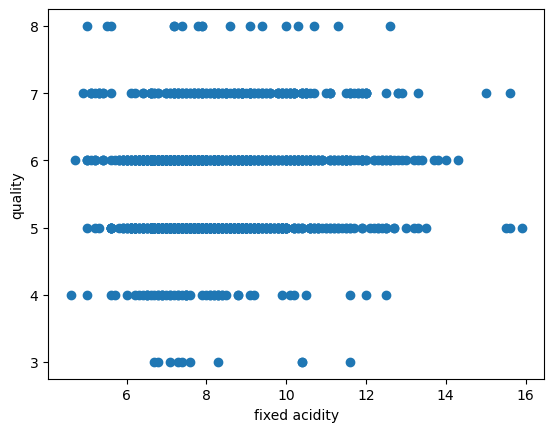

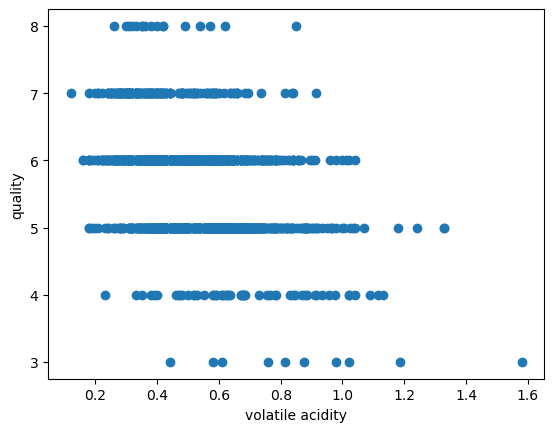

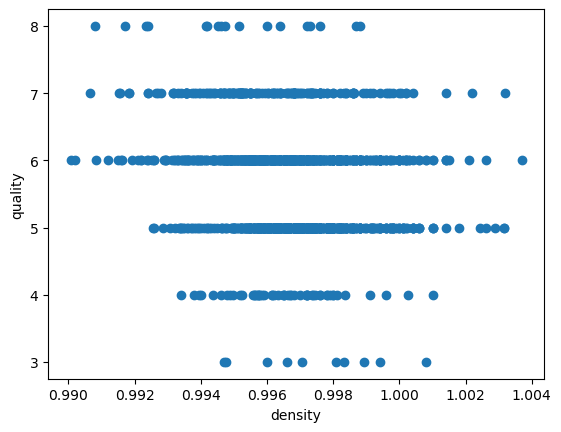

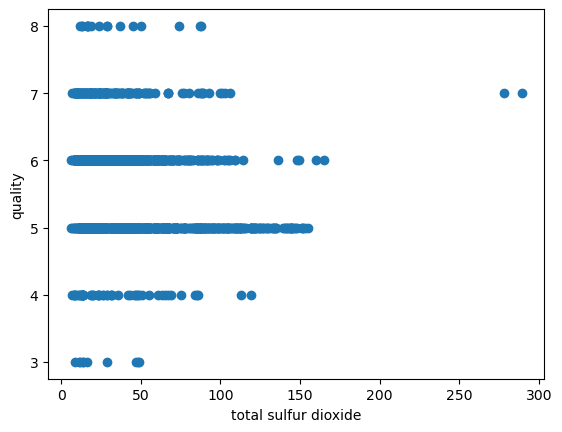

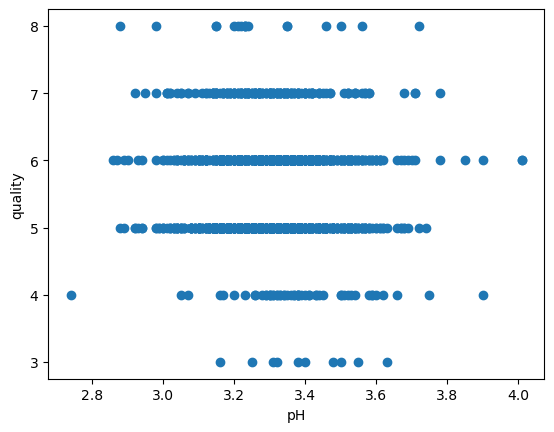

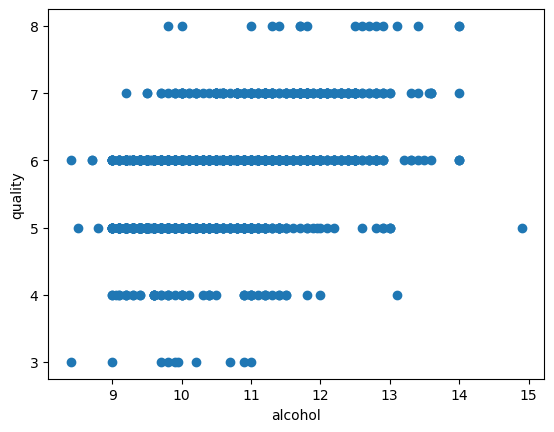

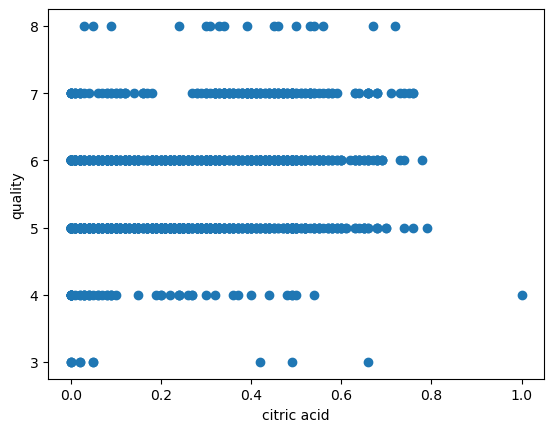

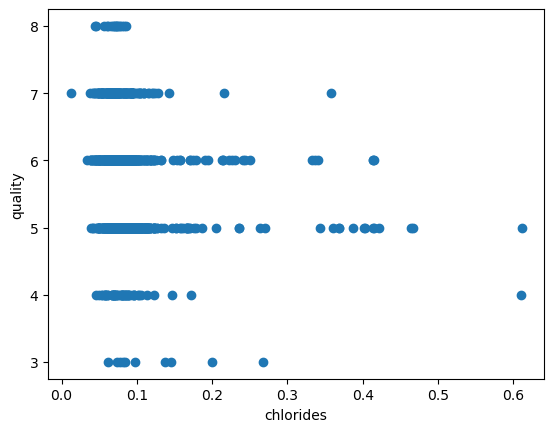

In [21]:
y = df['quality']
for col in columns: 
    x= df[col]
    plt.scatter(x, y)
    plt.xlabel(col)
    plt.ylabel("quality")
    plt.show()

looking at the scatter plots, it is evident that there is no real correlation between any of the variables with the quality of wine

### **`Histogram`** (May be wrong since the data is continous)
x = Alcohol, Chlorides, Citric Acid, Density, Fixed Acidity, Free Sulfur Dioxide, pH, Residual Sugar, Sulphates, Total Sulfur Dioxide, Volatile Acidity 

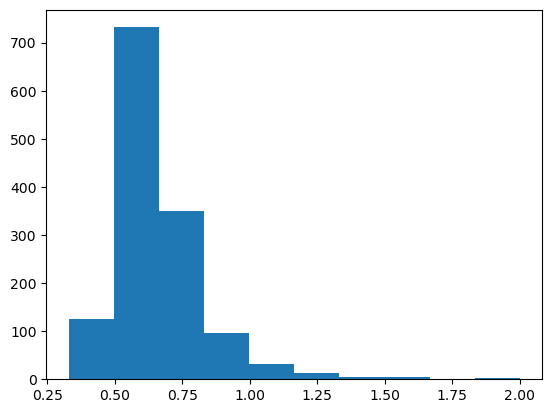

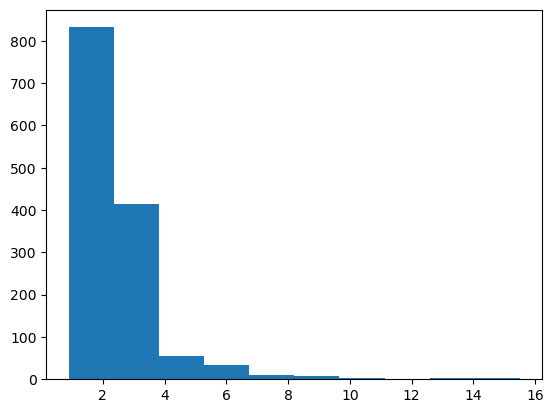

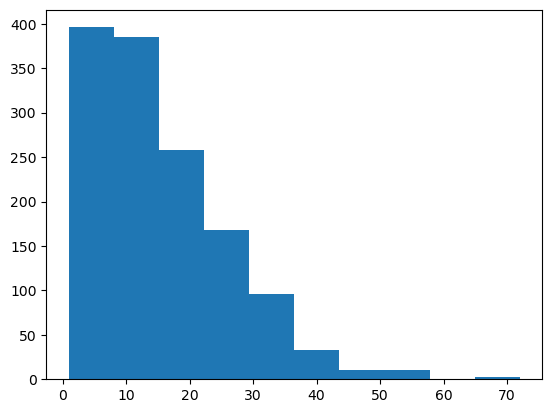

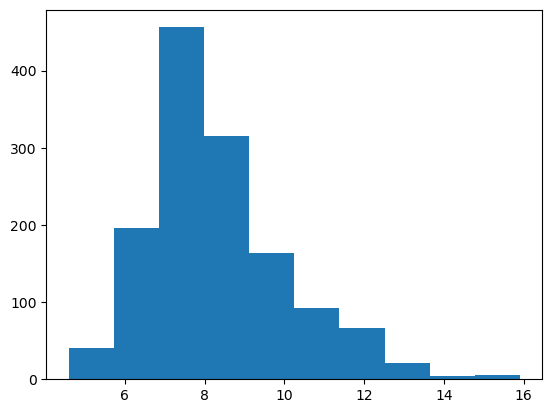

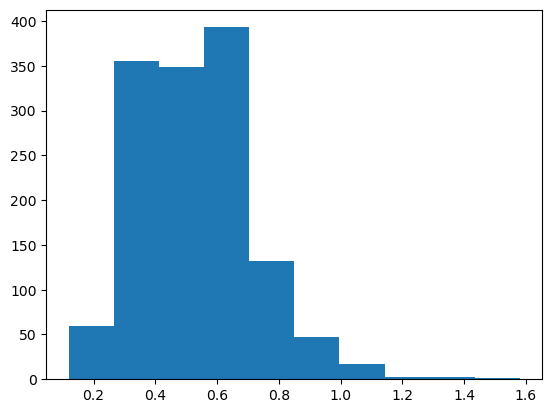

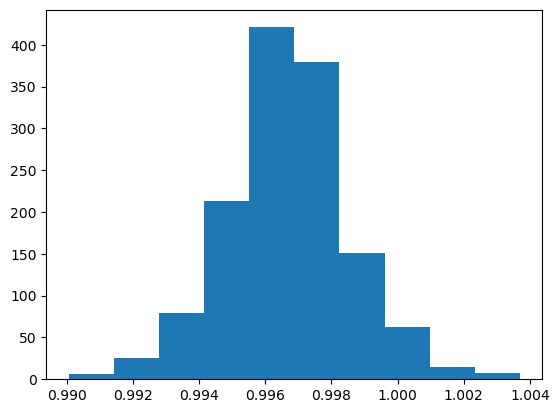

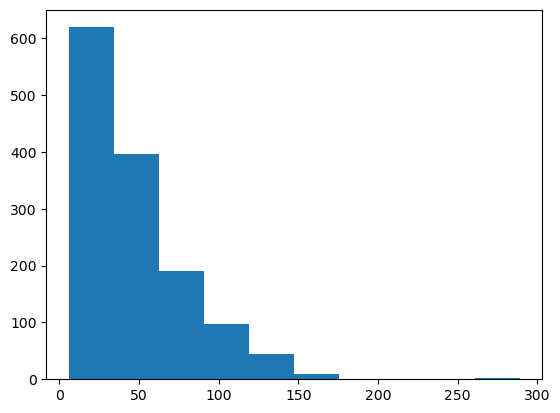

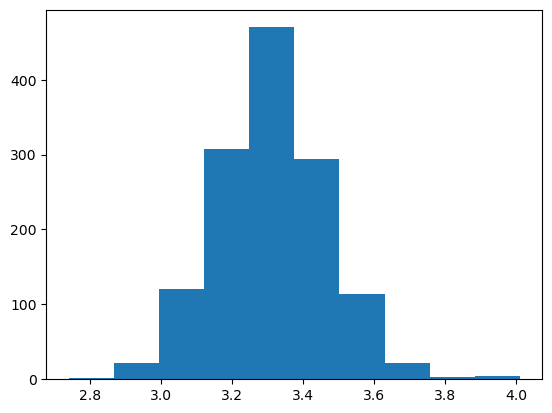

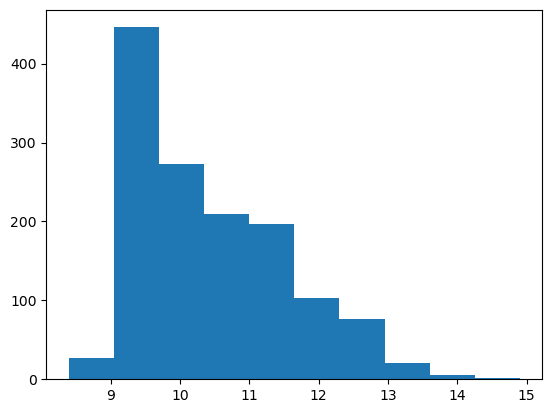

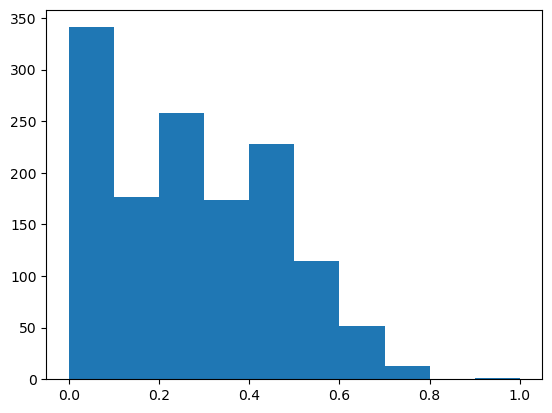

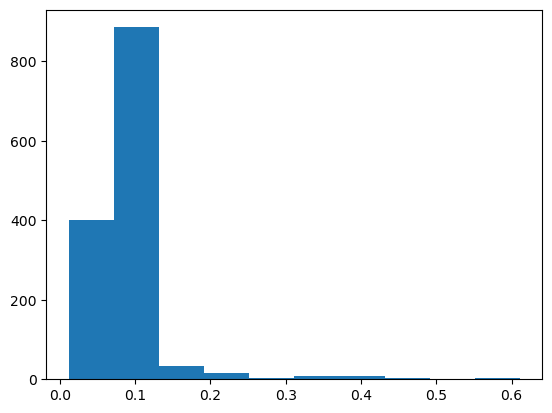

In [23]:
for col in columns: 
    x= df[col]
    plt.hist(x, )
    plt.show()

# References

- https://sinatech.info/en/acetic-volatile-acidity-in-wine-cider-vinegars-and-juices/#:~:text=Fixed%20acidity%20corresponds%20to%20the,of%20a%20distillation%20process%3A%20formic

- https://www.awri.com.au/industry_support/winemaking_resources/frequently_asked_questions/acidity_and_ph/